#LDA unigrams nouns only model

# Tagging the nouns in the text

In [2]:
# dataset for the unigrams nouns only
uni_nouns = df

# Create an empty list to store the processed texts
processed_texts = []

# Process the text for each row
for row in uni_nouns['cleanned_text']:
    # Convert the list of words to a string
    text = ' '.join(row)

    # Process the text
    doc = nlp(text)

    # Append the processed text to the list
    processed_texts.append(doc)

# Create 'tagged' column with POS tags
uni_nouns['tagged'] = processed_texts

# Check if tagged word is a noun and create 'noun' column
uni_nouns['noun'] = uni_nouns['tagged'].apply(lambda x: [word.text for word in x if word.pos_ in ['NOUN', 'PROPN']])

# Print the dataFrame
uni_nouns .head(5)

,Vraag,Antwoord,lemmatized_words,cleanned_text,tagged,noun
0,Zijn er andere thema's en onderwerpen waarover...,"Nee, informatievoorziening prima op orde","[Nee, ,, informatievoorziening, prima, op, orde]","[informatievoorziening, prima, orde]","(informatievoorziening, prima, orde)","[informatievoorziening, orde]"
1,Zijn er andere thema's en onderwerpen waarover...,Neen,[Neen],[],(),[]
2,Zijn er andere thema's en onderwerpen waarover...,Aanbestedingen en onderhoudscontracten. Het pe...,"[Aanbestedingen, en, onderhoudscontracten, ., ...","[aanbestedingen, onderhoudscontracten, persone...","(aanbestedingen, onderhoudscontracten, persone...","[aanbestedingen, personeel, communicatie]"
3,Zijn er andere thema's en onderwerpen waarover...,geen andere them's,"[geen, andere, them, 's]",[them],(them),[them]
4,Zijn er andere thema's en onderwerpen waarover...,Nee,[Nee],[],(),[]


[0.3968262576003599, 0.393993522227716, 0.39489639253852554, 0.3965656820011404, 0.3894637975266092, 0.39927903717145, 0.3945517471376349, 0.3890590003205735, 0.38355693133174096, 0.3918316064896269, 0.3882509097869409, 0.3948906780165079, 0.3925763201151339, 0.3826042131031008, 0.3842055209038963, 0.3893939481740166, 0.3855278978985567, 0.3855370209847635, 0.38888621897939785, 0.38161712909317747]


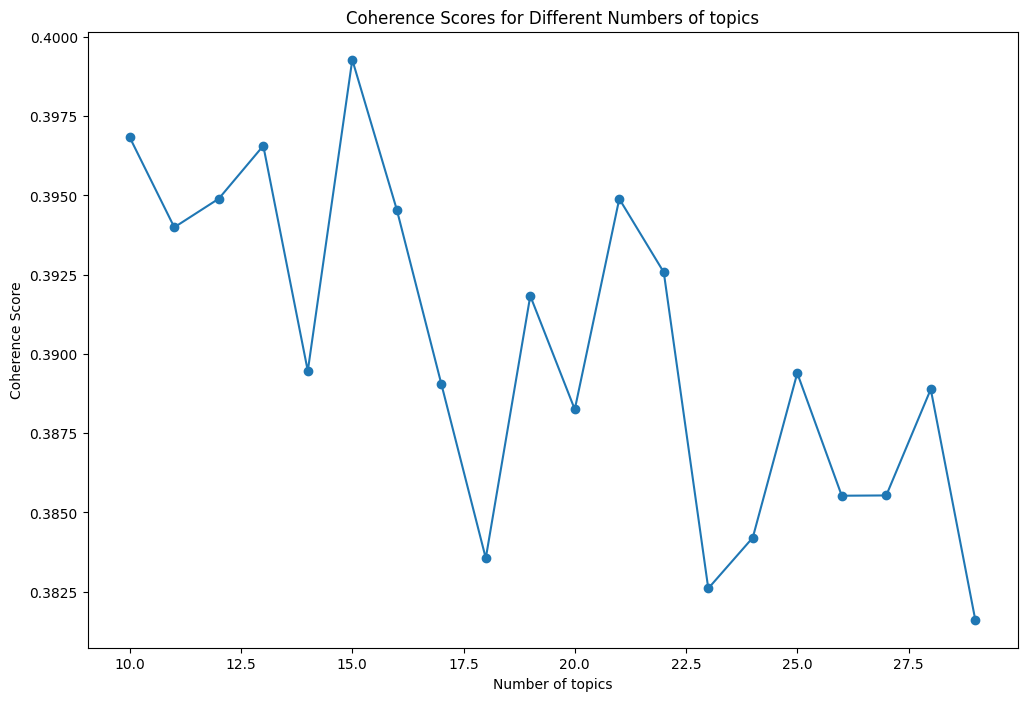

In [3]:
# Set the number of runs to obtain an average coherence score
runs = 10

# Create a dictionary
id2word = corpora.Dictionary(uni_nouns['noun'])

# Filter out words that occur in less than 5 documents or more than 20% of the documents
id2word.filter_extremes(no_below=5, no_above=0.2)

# Create a corpus
corpus = [id2word.doc2bow(doc) for doc in uni_nouns['noun']]

# Set the range of cluster numbers to evaluate
cluster_range = range(10, 30)

# Create list to store coherence score
coherence_scores = []

# Create list to store average coherence scores
avg_coherence_scores = []
models = []

# Calculate coherence scores for each cluster number
for num_clusters in cluster_range:
    random.seed(42)
    model_coherences = []
    for _ in range(runs):
        #Initialize the LDA model
        model = LdaModel(corpus=corpus, num_topics=num_clusters)

        # Calculate the coherence score of the model
        coherencemodel = CoherenceModel(model=model, texts=uni_nouns['noun'], dictionary=id2word, coherence='c_v')
        coherence_scores.append(coherencemodel.get_coherence())

        # Calculate coherence per run
        model_coherences.append(coherencemodel.get_coherence())

    # Calculate average coherence
    avg_coherence = sum(model_coherences) / runs

    # Append average coherence to separate list
    avg_coherence_scores.append(avg_coherence)
    models.append(model)

# Print the average coherence score
print(avg_coherence_scores)

# Visualize the coherence scores in a plot
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, avg_coherence_scores, marker='o')
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of topics")
plt.show()

##Grid research for the alpha and eta

In [4]:
# Define the alpha and eta values to evaluate
alpha_range = [0.01, 0.05, 0.1, 0.5, 1, 3.5]
eta_range = [0.01, 0.05, 0.1, 0.5, 1, 3.5]

best_coherence = -1.0
best_alpha = None
best_eta = None

# Iterate over all combinations of alpha and eta
for alpha in alpha_range:
    for eta in eta_range:
        model = LdaModel(corpus=corpus, num_topics=10, id2word=id2word, alpha=alpha, eta=eta)
        coherence_model = CoherenceModel(model=model, texts=uni_nouns['noun'], dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        print("Alpha:", alpha, "Eta:", eta, "Coherence Score:", coherence_score)

        # Check if this is the best coherence score so far
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_alpha = alpha
            best_eta = eta

# Print the best coherence score and corresponding alpha and eta values
print("Best Coherence Score:", best_coherence)
print("Best Alpha:", best_alpha)
print("Best Eta:", best_eta)

Alpha: 0.01 Eta: 0.01 Coherence Score: 0.4110957569874151


Alpha: 0.01 Eta: 0.05 Coherence Score: 0.3814615567928371


Alpha: 0.01 Eta: 0.1 Coherence Score: 0.4055554511357381


Alpha: 0.01 Eta: 0.5 Coherence Score: 0.39551074290428256


Alpha: 0.01 Eta: 1 Coherence Score: 0.4287734274491773


Alpha: 0.01 Eta: 3.5 Coherence Score: 0.3963562124643175


Alpha: 0.05 Eta: 0.01 Coherence Score: 0.39690998886269696


Alpha: 0.05 Eta: 0.05 Coherence Score: 0.3803663646427021


Alpha: 0.05 Eta: 0.1 Coherence Score: 0.4004129840294575


Alpha: 0.05 Eta: 0.5 Coherence Score: 0.3797242562726236


Alpha: 0.05 Eta: 1 Coherence Score: 0.3793139994837869


Alpha: 0.05 Eta: 3.5 Coherence Score: 0.40704963350683726


Alpha: 0.1 Eta: 0.01 Coherence Score: 0.4030438955247888


Alpha: 0.1 Eta: 0.05 Coherence Score: 0.40165594438493857


Alpha: 0.1 Eta: 0.1 Coherence Score: 0.3759406903020168


Alpha: 0.1 Eta: 0.5 Coherence Score: 0.40232434678980356


Alpha: 0.1 Eta: 1 Coherence Score: 0.4034263075062959


Alpha: 0.1 Eta: 3.5 Coherence Score: 0.41375431965451853


Alpha: 0.5 Eta: 0.01 Coherence Score: 0.4568293935050477


Alpha: 0.5 Eta: 0.05 Coherence Score: 0.4473769075377758


Alpha: 0.5 Eta: 0.1 Coherence Score: 0.4458652475219246


Alpha: 0.5 Eta: 0.5 Coherence Score: 0.4540044930470377


Alpha: 0.5 Eta: 1 Coherence Score: 0.4347127857051837


Alpha: 0.5 Eta: 3.5 Coherence Score: 0.4434924922797096


Alpha: 1 Eta: 0.01 Coherence Score: 0.48457225938825943


Alpha: 1 Eta: 0.05 Coherence Score: 0.46745275664812436


Alpha: 1 Eta: 0.1 Coherence Score: 0.45016016953273724


Alpha: 1 Eta: 0.5 Coherence Score: 0.4562899634439189


Alpha: 1 Eta: 1 Coherence Score: 0.45484687617727004


Alpha: 1 Eta: 3.5 Coherence Score: 0.4723539403205453


Alpha: 3.5 Eta: 0.01 Coherence Score: 0.47408463445344806


Alpha: 3.5 Eta: 0.05 Coherence Score: 0.4566363382336118


Alpha: 3.5 Eta: 0.1 Coherence Score: 0.4703306532365432


Alpha: 3.5 Eta: 0.5 Coherence Score: 0.47088015782189335


Alpha: 3.5 Eta: 1 Coherence Score: 0.4712752738829959
Alpha: 3.5 Eta: 3.5 Coherence Score: 0.4605210344715857
Best Coherence Score: 0.48457225938825943
Best Alpha: 1
Best Eta: 0.01


## LDA model with the optimal number of topics, alpha and eta

In [12]:
# Initialize the alpha and eta
alpha = 0.1
eta = 0.1

# Initialize the LDA model with specified parameters
model = LdaModel(corpus=corpus, num_topics=10,id2word=id2word, alpha=alpha, eta=eta)

# Calculate the coherence score of the model
coherence_model = CoherenceModel(model=model, texts=uni_nouns['noun'], dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Print the coherence score of the model
print("Coherence Score:", coherence_score)

Coherence Score: 0.3985087138115611


In [13]:
# Number op topic with the highest coherence value
N_TOPICS = 10

# Getting words with the highest probability for the each topic
for topic in range(N_TOPICS):
    words = model.show_topic(topic, 10)
    topic_n_words = ' '.join([word[0] for word in words])
    print('Topic {}: {}'.format(str(topic), topic_n_words))

Topic 0: collega medewerkers week vragen waardering team personeel werk kennis teamleider
Topic 1: dag team vraag collega mensen teamleider project week werk klanten
Topic 2: organisatie jaar moment werk functie medewerker informatie afdeling koers strategie
Topic 3: afdeling projecten innovaties werk sector plaats programma collega functie communicatie
Topic 4: collega werk werknemers team functie tijd medewerkers gevoel organisatie plaats
Topic 5: projecten medewerkers klanten team werknemers mensen werken organisatie thuiswerk zaken
Topic 6: personeel thema communicatie samenwerking collega zaken werken werkmaatschappij informatie klanten
Topic 7: werk functie info medewerkers informatie kennis kantoor organisatie plaats sector
Topic 8: projecten organisatie collega veranderingen info werk mensen afdeling afdelingen gevoel
Topic 9: informatie mensen organisatie mail zaken dingen communicatie medewerkers projecten teamleider


In [7]:
# Print the words with probabilities for each topic
model.print_topics()

[(0,
  '0.069*"werk" + 0.049*"sector" + 0.032*"organisatie" + 0.032*"voortgang" + 0.023*"afdeling" + 0.020*"mensen" + 0.020*"visie" + 0.017*"functie" + 0.017*"clienten" + 0.017*"mogelijkheden"'),
 (1,
  '0.041*"organisatie" + 0.037*"vraag" + 0.034*"innovaties" + 0.032*"team" + 0.024*"info" + 0.024*"personeel" + 0.023*"werken" + 0.021*"week" + 0.021*"functie" + 0.019*"dag"'),
 (2,
  '0.070*"projecten" + 0.033*"klanten" + 0.031*"medewerkers" + 0.030*"informatie" + 0.029*"werk" + 0.022*"collega" + 0.021*"functie" + 0.021*"werknemers" + 0.020*"plaats" + 0.017*"werken"'),
 (3,
  '0.095*"collega" + 0.045*"informatie" + 0.045*"afdeling" + 0.026*"samenwerking" + 0.024*"werk" + 0.024*"directie" + 0.022*"team" + 0.022*"organisatie" + 0.017*"communicatie" + 0.017*"moment"'),
 (4,
  '0.049*"mensen" + 0.046*"werk" + 0.040*"collega" + 0.031*"jaar" + 0.029*"week" + 0.029*"teamleider" + 0.015*"medewerkers" + 0.015*"werkvloer" + 0.015*"dag" + 0.015*"werken"'),
 (5,
  '0.067*"afdeling" + 0.055*"team" + 